## Simple Guide on Method Chaining by using the Pandas Pipe method

### What is a Pandas Pipe?

The Pandas `pipe` method is a powerful tool that allows users to chain multiple data processing functions in a clear and readable manner. This method can handle both positional and keyword arguments, making it flexible for various custom functions. 

In short, Pandas `pipe` method:

    1. Enhances Code Readability
    2. Enables Function Chaining 
    3. Accommodates Custom Functions
    4. Improves Code Organization
    5. Efficient for Complex Transformations 

### Pandas Code without Pipe

First, we will write a simple data analysis code without using pipe so that we have a clear comparison of when we use pipe to simplify our data processing pipeline. 

For this tutorial, we will be using the [Online Sales Dataset - Popular Marketplace Data](https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data) from Kaggle that contains information about online sales transactions across different product categories.

    1. We will load the CSV file and display the top three rows from the dataset.  

In [5]:
import pandas as pd
df = pd.read_csv('Online Sales Data.csv')
df.head(3)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card



    2. Clean the dataset by dropping duplicates and missing values and reset the index. 
    3. Convert column types. We will convert “Product Category” and “Product Name” to string and “Date” column to date type. 
    4. To perform analysis, we will create a “month” column out of a “Date” column. Then, calculate the mean values of units sold per month. 
    5. Visualize the bar chart of the average unit sold per month.  

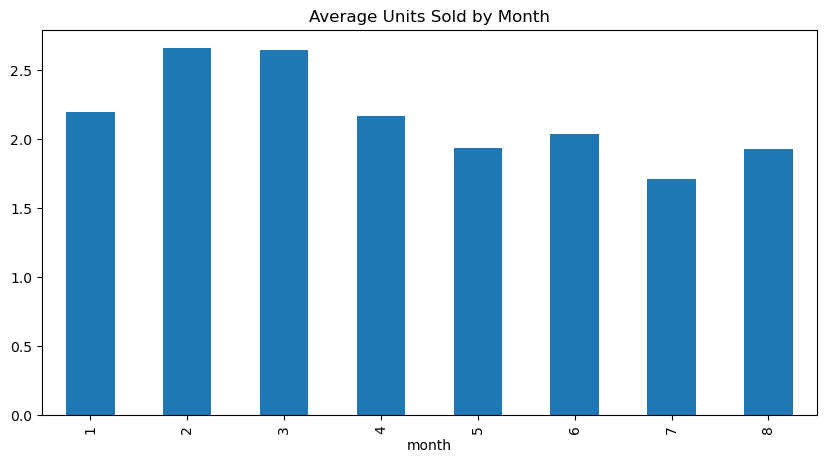

In [6]:
# data cleaning
df = df.drop_duplicates()
df = df.dropna()
df = df.reset_index(drop=True)

# convert types
df['Product Category'] = df['Product Category'].astype('str')
df['Product Name'] = df['Product Name'].astype('str')
df['Date'] = pd.to_datetime(df['Date'])

# data analysis
df['month'] = df['Date'].dt.month
new_df = df.groupby('month')['Units Sold'].mean()

# data visualization
new_df.plot(kind='bar', figsize=(10, 5), title='Average Units Sold by Month');

### Buiding Data Pipelines using Pandas Pipe

To create an end-to-end data pipeline, we first have to convert the above code into a proper format using Python functions. 

We will create Python functions for:

    1. Loading the data: It requires a directory of CSV files. 
    2. Cleaning the data: It requires raw DataFrame and returns the cleaned DataFrame. 
    3. Convert column types: It requires a clean DataFrame and data types and returns the DataFrame with the correct data types. 
    4. Data analysis: It requires a DataFrame from the previous step and returns the modified DataFrame with two columns. 
    5. Data visualization: It requires a modified DataFrame and visualization type to generate visualization. 

In [3]:
def load_data(path):
    return pd.read_csv(path)

def data_cleaning(data):
    data = data.drop_duplicates()
    data = data.dropna()
    data = data.reset_index(drop=True)
    return data

def convert_dtypes(data, types_dict=None):
    data = data.astype(dtype=types_dict)
    ## convert the date column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    return data


def data_analysis(data):
    data['month'] = data['Date'].dt.month
    new_df = data.groupby('month')['Units Sold'].mean()
    return new_df

def data_visualization(new_df,vis_type='bar'):
    new_df.plot(kind=vis_type, figsize=(10, 5), title='Average Units Sold by Month')
    return new_df

We will now use the `pipe` method to chain all of the above Python functions in series. As we can see, we have provided the path of the file to the `load_data` function, data types to the `convert_dtypes` function, and visualization type to the `data_visualization` function. Instead of a bar, we will use a visualization line chart. 

Building the data pipelines allows us to experiment with different scenarios without changing the overall code. You are standardizing the code and making it more readable.

In [4]:
data_path = '../data/Online Sales Data.csv'

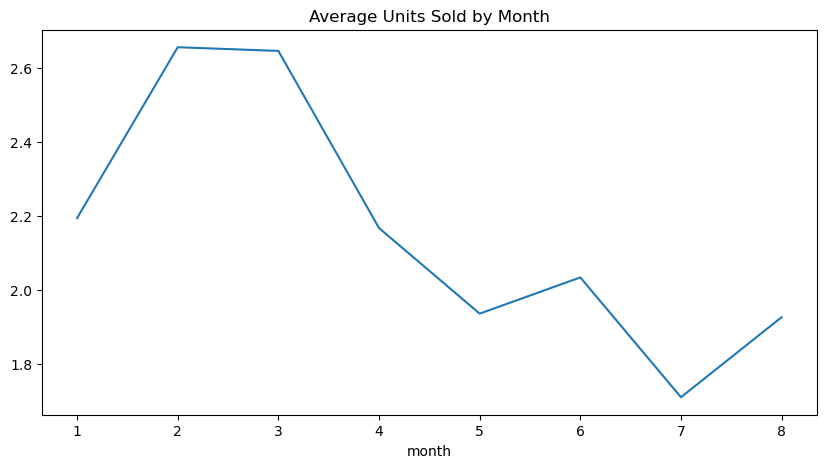

In [5]:
df = (pd.DataFrame()
            .pipe(lambda x: load_data(data_path))
            .pipe(data_cleaning)
            .pipe(convert_dtypes,{'Product Category': 'str', 'Product Name': 'str'})
            .pipe(data_analysis)
            .pipe(data_visualization,'line')
           )